In [328]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_bureau = pd.read_csv('/content/drive/MyDrive/Data PBI-Home Credit Indonesia/bureau.csv')

In [4]:
df_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [5]:
aggregated_bureau = df_bureau.groupby(['SK_ID_CURR']).agg({'SK_ID_BUREAU':'count'}).reset_index()

In [6]:
aggregated_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [7]:
df_bureau.drop(columns=['AMT_ANNUITY'], inplace=True)

In [8]:
df_bureau.drop(columns=['AMT_CREDIT_MAX_OVERDUE'], inplace=True)

In [9]:
df_bureau.drop(columns=['DAYS_CREDIT_ENDDATE'], inplace=True)

In [10]:
df_bureau.drop(columns=['DAYS_ENDDATE_FACT'], inplace=True)

In [11]:
df_bureau.drop(columns=['CNT_CREDIT_PROLONG'], inplace=True)

In [12]:
df_bureau.drop(columns=['DAYS_CREDIT_UPDATE'], inplace=True)

In [13]:
df_bureau.drop(columns=['CREDIT_TYPE'], inplace=True)

In [14]:
df_bureau.drop(columns=['CREDIT_ACTIVE'], inplace=True)

In [15]:
df_bureau.drop(columns=['CREDIT_CURRENCY'], inplace=True)

In [16]:
df_bureau.drop(columns=['CREDIT_DAY_OVERDUE'], inplace=True)

In [17]:
df_bureau.drop(columns=['DAYS_CREDIT'], inplace=True)

In [ ]:
df_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE
0,215354,5714462,91323.0,0.0,NaN,0.0
1,215354,5714463,225000.0,171342.0,NaN,0.0
2,215354,5714464,464323.5,NaN,NaN,0.0
3,215354,5714465,90000.0,NaN,NaN,0.0
4,215354,5714466,2700000.0,NaN,NaN,0.0


In [18]:
df_bureau_agg = df_bureau.groupby('SK_ID_CURR').agg({'SK_ID_BUREAU':'count', 'AMT_CREDIT_SUM':'mean', 'AMT_CREDIT_SUM_DEBT':'mean',
                                           'AMT_CREDIT_SUM_LIMIT':'mean', 'AMT_CREDIT_SUM_OVERDUE':'mean'}).reset_index()

In [ ]:
df_bureau_agg.head()

,SK_ID_CURR,SK_ID_BUREAU,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE
0,100001,7,207623.571429,85240.928571,0.00000,0.0
1,100002,8,108131.945625,49156.200000,7997.14125,0.0
2,100003,4,254350.125000,0.000000,202500.00000,0.0
3,100004,2,94518.900000,0.000000,0.00000,0.0
4,100005,3,219042.000000,189469.500000,0.00000,0.0


In [19]:
df_bureau_join = pd.merge(df_bureau_agg, df_bureau, how='outer')

In [ ]:
df_bureau_join.head()

,SK_ID_CURR,SK_ID_BUREAU,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE
0,100001,7,207623.571429,85240.928571,0.00000,0.0
1,100002,8,108131.945625,49156.200000,7997.14125,0.0
2,100003,4,254350.125000,0.000000,202500.00000,0.0
3,100004,2,94518.900000,0.000000,0.00000,0.0
4,100005,3,219042.000000,189469.500000,0.00000,0.0


In [20]:
df_sample_bureau = df_bureau.sample(n=10000, random_state=42)

In [ ]:
print(df_sample_bureau)

         SK_ID_CURR  SK_ID_BUREAU  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
1236926      305481       5916012       450000.00                  0.0   
904815       288975       5667606       169884.00                  0.0   
849614       309911       6052617       112500.00                  0.0   
16038        358247       6025723       140611.50                  NaN   
124732       452117       5242575        43960.50                  0.0   
...             ...           ...             ...                  ...   
1446920      230492       5773005        24917.49                  0.0   
1671639      225519       5752599        20970.00                  0.0   
989785       104415       5081203       450450.00             418995.0   
989173       233106       5080432        45000.00                  0.0   
1480113      179299       5353484       217080.00                  0.0   

         AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  
1236926                   NaN                     0.0  

In [21]:
df_bureau_balance = pd.read_csv('/content/drive/MyDrive/Data PBI-Home Credit Indonesia/bureau_balance.csv')

In [ ]:
df_bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [22]:
df_bureau_balance.drop(columns=['STATUS'], inplace=True)

In [23]:
df_bureau_balance_agg = df_bureau_balance.groupby('SK_ID_BUREAU').agg({'MONTHS_BALANCE':'mean'}).reset_index()

df_bureau_balance_agg.head()

,SK_ID_BUREAU,MONTHS_BALANCE
0,5001709,-48.0
1,5001710,-41.0
2,5001711,-1.5
3,5001712,-9.0
4,5001713,-10.5


In [24]:
df_bureau_balance_join = pd.merge(df_bureau_balance_agg, df_bureau_balance, how='outer')

<ipython-input-24-93f7d47c6e21>:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df_bureau_balance_join = pd.merge(df_bureau_balance_agg, df_bureau_balance, how='outer')


In [ ]:
df_bureau_balance_join.head()

,SK_ID_BUREAU,MONTHS_BALANCE
0,5001709,-48.0
1,5001710,-41.0
2,5001711,-1.5
3,5001712,-9.0
4,5001713,-10.5


In [25]:
df_sample_bureau_balance = df_bureau_balance_join.sample(n=10000, random_state=42)

print(df_sample_bureau_balance)

          SK_ID_BUREAU  MONTHS_BALANCE
937986         6584317            -1.0
7433179        6448853           -58.0
17755770       5658956           -28.0
16179540       6792963           -12.0
4325677        5236005            -8.0
...                ...             ...
16079857       5400710           -63.0
11235740       6326777           -33.0
5065572        5009178            -3.0
10041119       6525803           -10.0
9853878        6409501           -45.0

[10000 rows x 2 columns]


In [26]:
df_merge_1 = pd.merge(df_sample_bureau, df_sample_bureau_balance, how='inner')

In [ ]:
df_merge_1.head()

,SK_ID_CURR,SK_ID_BUREAU,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,MONTHS_BALANCE
0,313077,6397667,476730.0,0.0,0.0,0.0,-6.0
1,271248,5791364,472500.0,200425.5,0.0,0.0,-11.0
2,287281,5491357,225000.0,NaN,NaN,0.0,-6.0
3,395606,5995704,136566.0,0.0,NaN,0.0,-84.0
4,376409,6231362,225000.0,0.0,0.0,0.0,-42.0


In [27]:
df_installment = pd.read_csv('/content/drive/MyDrive/Data PBI-Home Credit Indonesia/installments_payments.csv')

In [ ]:
df_installment.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [28]:
df_installment.drop(columns=['NUM_INSTALMENT_VERSION'], inplace=True)

In [29]:
df_installment.drop(columns=['NUM_INSTALMENT_NUMBER'], inplace=True)

In [30]:
df_installment.drop(columns=['DAYS_ENTRY_PAYMENT'], inplace=True)

In [31]:
df_installment.drop(columns=['DAYS_INSTALMENT'], inplace=True)

In [32]:
df_installment.drop(columns=['AMT_INSTALMENT'], inplace=True)

In [33]:
df_installment['AMT_PAYMENT'].fillna(df_installment['AMT_PAYMENT'].median(), inplace=True)

In [34]:
df_installment_agg = df_installment.groupby('SK_ID_PREV').agg({'SK_ID_CURR':'count', 'AMT_PAYMENT':'mean'}).reset_index()


In [ ]:
df_installment_agg.head()

,SK_ID_PREV,SK_ID_CURR,AMT_PAYMENT
0,1000001,2,34221.712500
1,1000002,4,9308.891250
2,1000003,3,4951.350000
3,1000004,7,4789.022143
4,1000005,11,13365.609545


In [35]:
df_installment_join = pd.merge(df_installment_agg, df_installment, how='outer')

In [ ]:
df_installment_join.head()

,SK_ID_PREV,SK_ID_CURR,AMT_PAYMENT
0,1000001,2,34221.712500
1,1000002,4,9308.891250
2,1000003,3,4951.350000
3,1000004,7,4789.022143
4,1000005,11,13365.609545


In [36]:
df_sample_install = df_installment_join.sample(n=10000, random_state=42)

In [ ]:
print(df_sample_install)

          SK_ID_PREV  SK_ID_CURR  AMT_PAYMENT
312752       1543895          10    12768.444
9079722      1894683      331197      604.440
2825343      2310320      149144    28316.115
11183258     2205281      311375    11772.315
9478626      1294987      302420       67.500
...              ...         ...          ...
2648752      1564844      154573    24517.260
9212379      2496929      385920     7042.140
8184334      2070878      200849     5870.610
11343305     1362348      378323    18559.170
9111909      2060571      312381     2252.745

[10000 rows x 3 columns]


In [37]:
df_cc_balance = pd.read_csv('/content/drive/MyDrive/Data PBI-Home Credit Indonesia/credit_card_balance.csv')

In [ ]:
df_cc_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [ ]:
df_cc_balance.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [38]:
df_cc_balance.drop(columns=['AMT_DRAWINGS_ATM_CURRENT'], inplace=True)

In [39]:
df_cc_balance.drop(columns=['AMT_DRAWINGS_CURRENT'], inplace=True)

In [40]:
df_cc_balance.drop(columns=['AMT_DRAWINGS_OTHER_CURRENT'], inplace=True)

In [41]:
df_cc_balance.drop(columns=['AMT_INST_MIN_REGULARITY'], inplace=True)

In [42]:
df_cc_balance.drop(columns=['CNT_DRAWINGS_ATM_CURRENT'], inplace=True)

In [45]:
df_cc_balance.drop(columns=['CNT_DRAWINGS_OTHER_CURRENT'], inplace=True)

In [43]:
df_cc_balance.drop(columns=['CNT_DRAWINGS_POS_CURRENT'], inplace=True)

In [44]:
df_cc_balance.drop(columns=['CNT_INSTALMENT_MATURE_CUM'], inplace=True)

In [46]:
df_cc_balance.drop(columns=['AMT_DRAWINGS_POS_CURRENT'], inplace=True)

In [47]:
df_cc_balance.drop(columns=['AMT_PAYMENT_CURRENT'], inplace=True)

In [48]:
df_cc_balance.drop(columns=['NAME_CONTRACT_STATUS'], inplace=True)

In [49]:
df_cc_balance.drop(columns=['SK_DPD'], inplace=True)

In [50]:
df_cc_balance.drop(columns=['SK_DPD_DEF'], inplace=True)

In [51]:
df_cc_balance.drop(columns=['CNT_DRAWINGS_CURRENT'], inplace=True)

In [52]:
df_cc_balance.drop(columns=['AMT_RECIVABLE'], inplace=True)

In [53]:
df_cc_balance.drop(columns=['AMT_TOTAL_RECEIVABLE'], inplace=True)

In [54]:
df_cc_balance.drop(columns=['AMT_RECEIVABLE_PRINCIPAL'], inplace=True)

In [ ]:
df_cc_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_PAYMENT_TOTAL_CURRENT
0,2562384,378907,-6,56.970,135000,1800.0
1,2582071,363914,-1,63975.555,45000,2250.0
2,1740877,371185,-7,31815.225,450000,2250.0
3,1389973,337855,-4,236572.110,225000,11925.0
4,1891521,126868,-1,453919.455,450000,27000.0


In [55]:
df_cc_balance_agg = df_cc_balance.groupby('SK_ID_PREV').agg({'SK_ID_CURR':'count', 'MONTHS_BALANCE':'mean', 'AMT_CREDIT_LIMIT_ACTUAL':'mean',
                                                             'AMT_PAYMENT_TOTAL_CURRENT':'mean'}).reset_index()

In [ ]:
df_cc_balance_agg.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_PAYMENT_TOTAL_CURRENT
0,1000018,5,-4.0,81000.000000,5541.750000
1,1000030,8,-4.5,81562.500000,2657.947500
2,1000031,16,-8.5,149625.000000,22157.443125
3,1000035,5,-4.0,225000.000000,0.000000
4,1000077,11,-7.0,94090.909091,0.000000


In [56]:
df_balance_join = pd.merge(df_cc_balance, df_cc_balance_agg,  how='outer')

<ipython-input-56-5acc7d91ff17>:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df_balance_join = pd.merge(df_cc_balance, df_cc_balance_agg,  how='outer')


In [ ]:
df_balance_join.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_PAYMENT_TOTAL_CURRENT
0,2562384,378907,-6.0,56.970,135000.0,1800.0
1,2582071,363914,-1.0,63975.555,45000.0,2250.0
2,1740877,371185,-7.0,31815.225,450000.0,2250.0
3,1389973,337855,-4.0,236572.110,225000.0,11925.0
4,1891521,126868,-1.0,453919.455,450000.0,27000.0


In [57]:
df_sample_cc = df_balance_join.sample(n=10000, random_state=42)

In [ ]:
print(df_sample_cc)

         SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
710204      1810845      220105           -27.0        0.000   
1811945     1906193      202958           -47.0    64885.860   
2037325     2441170      447292           -29.0   174188.565   
2363667     2543082      283411            -2.0        0.000   
3737389     1959521      209766            -7.0        0.000   
...             ...         ...             ...          ...   
2008648     2511900      455209           -30.0      864.045   
3036150     2162366      384536            -3.0      326.295   
3366037     2144914      160533           -20.0        0.000   
1474549     1474056      254605           -12.0        0.000   
2162054     2353039      230383            -6.0        0.000   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_PAYMENT_TOTAL_CURRENT  
710204                  135000.0                       0.00  
1811945                  67500.0                       0.00  
2037325                 180000.0             

In [58]:
df_merge_2 = pd.merge(df_sample_install, df_sample_cc, how='inner')

In [ ]:
df_merge_2.head()

,SK_ID_PREV,SK_ID_CURR,AMT_PAYMENT,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_PAYMENT_TOTAL_CURRENT
0,2391655,428540,4500.00,-61.0,91731.915,90000.0,9000.0
1,2374628,140372,1416.87,-24.0,0.000,0.0,0.0
2,1956824,348403,225.00,-3.0,44520.795,112500.0,8100.0
3,1745224,415589,4.50,-61.0,209540.250,202500.0,14175.0
4,1745224,415589,4.50,-61.0,209540.250,202500.0,14175.0


In [59]:
df_pos_cash = pd.read_csv('/content/drive/MyDrive/Data PBI-Home Credit Indonesia/POS_CASH_balance.csv')

In [ ]:
df_pos_cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [ ]:
df_pos_cash.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [60]:
df_pos_cash.drop(columns=['CNT_INSTALMENT'], inplace=True)

In [61]:
df_pos_cash.drop(columns=['CNT_INSTALMENT_FUTURE'], inplace=True)

In [62]:
df_pos_cash.drop(columns=['NAME_CONTRACT_STATUS'], inplace=True)

In [63]:
df_pos_cash.drop(columns=['SK_DPD'], inplace=True)
df_pos_cash.drop(columns=['SK_DPD_DEF'], inplace=True)

In [ ]:
df_pos_cash.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE
0,1803195,182943,-31
1,1715348,367990,-33
2,1784872,397406,-32
3,1903291,269225,-35
4,2341044,334279,-35


In [64]:
df_pos_cash_agg = df_pos_cash.groupby('SK_ID_PREV').agg({'SK_ID_CURR':'count', 'MONTHS_BALANCE':'mean'}).reset_index()

In [ ]:
df_pos_cash_agg.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE
0,1000001,3,-9.0
1,1000002,5,-52.0
2,1000003,4,-2.5
3,1000004,8,-25.5
4,1000005,11,-51.0


In [65]:
df_sample_pos_cash = pd.merge(df_pos_cash, df_pos_cash_agg, how='outer')

<ipython-input-65-5bd501c25e90>:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df_sample_pos_cash = pd.merge(df_pos_cash, df_pos_cash_agg, how='outer')


In [ ]:
df_sample_pos_cash.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE
0,1803195,182943,-31.0
1,1715348,367990,-33.0
2,1784872,397406,-32.0
3,1903291,269225,-35.0
4,2341044,334279,-35.0


In [66]:
df_sample_pos_cash = df_pos_cash.sample(n=10000, random_state=42)

In [ ]:
print(df_sample_pos_cash)

         SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE
6385902     1141316      278001             -37
389847      2682740      248899             -67
7302029     2136647      209965             -73
6010681     1678541      432875              -8
2031441     1870173      117636             -86
...             ...         ...             ...
8729178     1927808      452881             -18
4994209     2712422      362646             -57
9376836     2836485      316183             -49
9300352     2559536      365239             -13
2516954     2014799      361021              -8

[10000 rows x 3 columns]


In [67]:
df_merge_3 = pd.merge(df_merge_2, df_sample_pos_cash, how='outer')

In [ ]:
df_merge_3.head()

,SK_ID_PREV,SK_ID_CURR,AMT_PAYMENT,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_PAYMENT_TOTAL_CURRENT
0,2391655,428540,4500.00,-61.0,91731.915,90000.0,9000.0
1,2374628,140372,1416.87,-24.0,0.000,0.0,0.0
2,1956824,348403,225.00,-3.0,44520.795,112500.0,8100.0
3,1745224,415589,4.50,-61.0,209540.250,202500.0,14175.0
4,1745224,415589,4.50,-61.0,209540.250,202500.0,14175.0


In [68]:
df_merge = pd.merge(df_merge_2, df_merge_3, how='outer')

In [ ]:
df_merge.head()

,SK_ID_PREV,SK_ID_CURR,AMT_PAYMENT,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_PAYMENT_TOTAL_CURRENT
0,2391655,428540,4500.00,-61.0,91731.915,90000.0,9000.0
1,2374628,140372,1416.87,-24.0,0.000,0.0,0.0
2,1956824,348403,225.00,-3.0,44520.795,112500.0,8100.0
3,1745224,415589,4.50,-61.0,209540.250,202500.0,14175.0
4,1745224,415589,4.50,-61.0,209540.250,202500.0,14175.0


In [69]:
df_previous_application = pd.read_csv('/content/drive/MyDrive/Data PBI-Home Credit Indonesia/previous_application.csv')

In [ ]:
df_previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
df_previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [ ]:
df_previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df_previous_application.drop(columns=['NAME_CONTRACT_TYPE'], inplace=True)

In [71]:
df_previous_application.drop(columns=['AMT_APPLICATION'], inplace=True)

In [72]:
df_previous_application.drop(columns=['AMT_DOWN_PAYMENT'], inplace=True)

In [73]:
df_previous_application.drop(columns=['AMT_GOODS_PRICE'], inplace=True)

In [74]:
df_previous_application.drop(columns=['WEEKDAY_APPR_PROCESS_START'], inplace=True)

In [75]:
df_previous_application.drop(columns=['HOUR_APPR_PROCESS_START'], inplace=True)

In [ ]:
df_previous_application.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,1730.430,17145.0,Y,1,0.0,0.182832,0.867336,XAP,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,25188.615,679671.0,Y,1,NaN,NaN,NaN,XNA,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,15060.735,136444.5,Y,1,NaN,NaN,NaN,XNA,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,47041.335,470790.0,Y,1,NaN,NaN,NaN,XNA,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,31924.395,404055.0,Y,1,NaN,NaN,NaN,Repairs,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df_previous_application.drop(columns=['FLAG_LAST_APPL_PER_CONTRACT'], inplace=True)

In [77]:
df_previous_application.drop(columns=['NFLAG_LAST_APPL_IN_DAY'], inplace=True)

In [78]:
df_previous_application.drop(columns=['RATE_DOWN_PAYMENT'], inplace=True)

In [79]:
df_previous_application.drop(columns=['RATE_INTEREST_PRIVILEGED'], inplace=True)

In [ ]:
df_previous_application.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,RATE_INTEREST_PRIMARY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,1730.430,17145.0,0.182832,XAP,Approved,-73,Cash through the bank,XAP,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,25188.615,679671.0,NaN,XNA,Approved,-164,XNA,XAP,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,15060.735,136444.5,NaN,XNA,Approved,-301,Cash through the bank,XAP,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,47041.335,470790.0,NaN,XNA,Approved,-512,Cash through the bank,XAP,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,31924.395,404055.0,NaN,Repairs,Refused,-781,Cash through the bank,HC,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df_previous_application.drop(columns=['DAYS_DECISION'], inplace=True)

In [ ]:
df_previous_application.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,RATE_INTEREST_PRIMARY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,1730.430,17145.0,0.182832,XAP,Approved,Cash through the bank,XAP,NaN,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,25188.615,679671.0,NaN,XNA,Approved,XNA,XAP,Unaccompanied,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,15060.735,136444.5,NaN,XNA,Approved,Cash through the bank,XAP,"Spouse, partner",...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,47041.335,470790.0,NaN,XNA,Approved,Cash through the bank,XAP,NaN,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,31924.395,404055.0,NaN,Repairs,Refused,Cash through the bank,HC,NaN,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df_previous_application.drop(columns=['CODE_REJECT_REASON'], inplace=True)

In [82]:
df_previous_application.drop(columns=['NAME_TYPE_SUITE'], inplace=True)

In [ ]:
df_previous_application.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,RATE_INTEREST_PRIMARY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,1730.430,17145.0,0.182832,XAP,Approved,Cash through the bank,Repeater,Mobile,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,25188.615,679671.0,NaN,XNA,Approved,XNA,Repeater,XNA,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,15060.735,136444.5,NaN,XNA,Approved,Cash through the bank,Repeater,XNA,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,47041.335,470790.0,NaN,XNA,Approved,Cash through the bank,Repeater,XNA,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,31924.395,404055.0,NaN,Repairs,Refused,Cash through the bank,Repeater,XNA,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df_previous_application.drop(columns=['NAME_CLIENT_TYPE'], inplace=True)

In [ ]:
df_previous_application.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,RATE_INTEREST_PRIMARY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,1730.430,17145.0,0.182832,XAP,Approved,Cash through the bank,Mobile,POS,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,25188.615,679671.0,NaN,XNA,Approved,XNA,XNA,Cash,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,15060.735,136444.5,NaN,XNA,Approved,Cash through the bank,XNA,Cash,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,47041.335,470790.0,NaN,XNA,Approved,Cash through the bank,XNA,Cash,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,31924.395,404055.0,NaN,Repairs,Refused,Cash through the bank,XNA,Cash,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df_previous_application.drop(columns=['NAME_PORTFOLIO'], inplace=True)

In [ ]:
df_previous_application.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,RATE_INTEREST_PRIMARY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_GOODS_CATEGORY,NAME_PRODUCT_TYPE,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,1730.430,17145.0,0.182832,XAP,Approved,Cash through the bank,Mobile,XNA,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,25188.615,679671.0,NaN,XNA,Approved,XNA,XNA,x-sell,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,15060.735,136444.5,NaN,XNA,Approved,Cash through the bank,XNA,x-sell,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,47041.335,470790.0,NaN,XNA,Approved,Cash through the bank,XNA,x-sell,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,31924.395,404055.0,NaN,Repairs,Refused,Cash through the bank,XNA,walk-in,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df_previous_application.drop(columns=['NAME_PRODUCT_TYPE'], inplace=True)

In [86]:
df_previous_application.drop(columns=['CHANNEL_TYPE'], inplace=True)

In [87]:
df_previous_application.drop(columns=['SELLERPLACE_AREA'], inplace=True)
df_previous_application.drop(columns=['NAME_SELLER_INDUSTRY'], inplace=True)
df_previous_application.drop(columns=['CNT_PAYMENT'], inplace=True)
df_previous_application.drop(columns=['NAME_YIELD_GROUP'], inplace=True)
df_previous_application.drop(columns=['PRODUCT_COMBINATION'], inplace=True)
df_previous_application.drop(columns=['DAYS_FIRST_DRAWING'], inplace=True)
df_previous_application.drop(columns=['DAYS_FIRST_DUE'], inplace=True)
df_previous_application.drop(columns=['DAYS_LAST_DUE_1ST_VERSION'], inplace=True)
df_previous_application.drop(columns=['DAYS_LAST_DUE'], inplace=True)
df_previous_application.drop(columns=['DAYS_TERMINATION'], inplace=True)
df_previous_application.drop(columns=['NFLAG_INSURED_ON_APPROVAL'], inplace=True)

In [88]:
df_previous_application.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,RATE_INTEREST_PRIMARY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_GOODS_CATEGORY
0,2030495,271877,1730.430,17145.0,0.182832,XAP,Approved,Cash through the bank,Mobile
1,2802425,108129,25188.615,679671.0,NaN,XNA,Approved,XNA,XNA
2,2523466,122040,15060.735,136444.5,NaN,XNA,Approved,Cash through the bank,XNA
3,2819243,176158,47041.335,470790.0,NaN,XNA,Approved,Cash through the bank,XNA
4,1784265,202054,31924.395,404055.0,NaN,Repairs,Refused,Cash through the bank,XNA


In [89]:
df_previous_application_agg = df_previous_application.groupby('SK_ID_PREV').agg({'SK_ID_CURR':'count', 'AMT_ANNUITY':'mean',
                                                                             'AMT_CREDIT':'mean'}).reset_index()

In [ ]:
df_previous_application_agg.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT
0,1000001,1,6404.310,65124.0
1,1000002,1,6264.000,35230.5
2,1000003,1,4951.350,52641.0
3,1000004,1,3391.110,30586.5
4,1000005,1,14713.605,120307.5


In [90]:
df_sample_previous = pd.merge(df_previous_application, df_previous_application_agg, how='inner')

In [91]:
df_sample_previous = df_previous_application.sample(n=10000, random_state=42)

In [ ]:
print(df_sample_previous)

         SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_CREDIT  \
876718      1327604      127360     5318.100     26082.0   
1463966     1830718      218834    19737.945    165226.5   
354631      1258084      104079     3304.710     32562.0   
408441      2257201      389250    10912.545    240948.0   
37031       1038283      385546          NaN         0.0   
...             ...         ...          ...         ...   
190102      1679701      427659          NaN         0.0   
1065526     1091986      338900     6484.005    134775.0   
1222668     1914082      287673     9000.000    180000.0   
1427074     1358507      262979          NaN         0.0   
401486      1305599      279804     1911.420     12631.5   

         RATE_INTEREST_PRIMARY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
876718                     NaN                    XAP             Approved   
1463966                    NaN                    XNA             Approved   
354631                     NaN               

In [92]:
df_merge_4 = pd.merge(df_sample_previous, df_merge, how='outer')

In [ ]:
df_merge_4.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,RATE_INTEREST_PRIMARY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_GOODS_CATEGORY,AMT_PAYMENT,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_PAYMENT_TOTAL_CURRENT
0,1327604,127360,5318.100,26082.0,NaN,XAP,Approved,Cash through the bank,Mobile,NaN,NaN,NaN,NaN,NaN
1,1830718,218834,19737.945,165226.5,NaN,XNA,Approved,XNA,XNA,NaN,NaN,NaN,NaN,NaN
2,1258084,104079,3304.710,32562.0,NaN,XAP,Approved,Cash through the bank,Mobile,NaN,NaN,NaN,NaN,NaN
3,2257201,389250,10912.545,240948.0,NaN,XAP,Approved,Cash through the bank,Audio/Video,NaN,NaN,NaN,NaN,NaN
4,1038283,385546,NaN,0.0,NaN,XNA,Canceled,XNA,XNA,NaN,NaN,NaN,NaN,NaN


In [93]:
df_sample_submission = pd.read_csv('/content/drive/MyDrive/Data PBI-Home Credit Indonesia/sample_submission.csv')

In [ ]:
df_sample_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [94]:
df_sample_ss_agg = df_sample_submission.groupby('SK_ID_CURR').agg({'TARGET':'mean'}).reset_index()

In [ ]:
df_sample_ss_agg.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [95]:
df_sample_ss = pd.merge(df_sample_ss_agg, df_sample_submission, how='outer')

In [ ]:
df_sample_ss.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [96]:
df_sample_ss = df_sample_submission.sample(n=10000, random_state=42)

print(df_sample_ss)

       SK_ID_CURR  TARGET
15071      208550     0.5
10157      173779     0.5
36313      365820     0.5
6017       144092     0.5
26319      291599     0.5
...           ...     ...
39671      392232     0.5
31684      330396     0.5
19761      243518     0.5
15541      212132     0.5
6649       148850     0.5

[10000 rows x 2 columns]


In [129]:
df_merge_new = pd.merge(df_merge_4, df_sample_ss, how='inner')

In [127]:
df_merge_new.head()

,SK_ID_PREV,SK_ID_CURR,AMT_PAYMENT,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_PAYMENT_TOTAL_CURRENT,TARGET
0,2834213,205909,8100.000,-79.0,83154.33,135000.0,18000.00,0.5
1,2834213,205909,8100.000,-8.0,0.00,45000.0,0.00,0.5
2,2777670,439047,118.485,-34.0,2881.98,270000.0,272025.00,0.5
3,1789247,442816,8565.030,-34.0,158101.65,225000.0,67828.41,0.5
4,1567264,142803,68.445,-96.0,108512.37,112500.0,6750.00,0.5


In [100]:
df_application = pd.read_csv('/content/drive/MyDrive/Data PBI-Home Credit Indonesia/application_train.csv')

In [101]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
df_sample_app = df_application.sample(n=10000, random_state=42)

In [105]:
df_sample_app_agg = df_sample_app.groupby('SK_ID_CURR').agg({'AMT_INCOME_TOTAL':'mean', 'AMT_CREDIT':'mean', 'AMT_ANNUITY':'mean',
                                                             'TARGET':'mean'}).reset_index()

In [107]:
df_sample_app_agg.head()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,TARGET
0,100020,108000.0,509602.5,26149.5,0.0
1,100029,135000.0,247500.0,12703.5,0.0
2,100056,360000.0,1506816.0,49927.5,0.0
3,100103,72000.0,450000.0,16965.0,0.0
4,100139,157500.0,302341.5,24016.5,0.0


In [114]:
df_sample_app_join = pd.merge(df_sample_app_agg, df_sample_app, how='outer')

In [115]:
df_sample_app_join.head()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100020,108000.0,509602.5,26149.5,0.0,Cash loans,M,N,N,0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
1,100029,135000.0,247500.0,12703.5,0.0,Cash loans,M,Y,N,2,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100056,360000.0,1506816.0,49927.5,0.0,Cash loans,M,Y,Y,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,100103,72000.0,450000.0,16965.0,0.0,Cash loans,F,N,Y,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100139,157500.0,302341.5,24016.5,0.0,Cash loans,F,N,N,1,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,3.0


In [104]:
df_sample_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 245895 to 211344
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 9.4+ MB


In [218]:
df_merge_join = pd.merge(df_merge_new, df_sample_app_join, how='outer')

In [219]:
df_merge_join.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,RATE_INTEREST_PRIMARY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_GOODS_CATEGORY,AMT_PAYMENT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,2740736.0,163273,7875.000,157500.0,NaN,XAP,Canceled,XNA,XNA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1632887.0,334660,NaN,115830.0,NaN,XAP,Unused offer,Cash through the bank,Mobile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1870958.0,275899,24035.355,257503.5,NaN,XAP,Approved,Cash through the bank,Auto Accessories,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1590112.0,115373,10794.375,53658.0,NaN,XAP,Approved,XNA,Mobile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2542497.0,124441,NaN,0.0,NaN,XNA,Canceled,XNA,XNA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
df_merge_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10642 entries, 0 to 10641
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SK_ID_PREV           642 non-null    float64
 1   SK_ID_CURR           10642 non-null  int64  
 2   AMT_ANNUITY          10239 non-null  float64
 3   AMT_CREDIT           10322 non-null  float64
 4   TARGET               10642 non-null  float64
 5   AMT_INCOME_TOTAL     10000 non-null  float64
 6   CODE_GENDER          10000 non-null  object 
 7   FLAG_OWN_CAR         10000 non-null  object 
 8   FLAG_OWN_REALTY      10000 non-null  object 
 9   CNT_CHILDREN         10000 non-null  float64
 10  NAME_EDUCATION_TYPE  10000 non-null  object 
 11  OCCUPATION_TYPE      6898 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.1+ MB


In [257]:
df_merge_join.isnull().sum()

SK_ID_PREV             10000
SK_ID_CURR                 0
AMT_ANNUITY              403
AMT_CREDIT               320
TARGET                     0
AMT_INCOME_TOTAL         642
CODE_GENDER              642
FLAG_OWN_CAR             642
FLAG_OWN_REALTY          642
CNT_CHILDREN             642
NAME_EDUCATION_TYPE      642
OCCUPATION_TYPE         3744
dtype: int64

In [256]:
df_merge_join.drop(columns=('FLAG_DOCUMENT_21'), inplace=True)
df_merge_join.drop(columns=('RATE_INTEREST_PRIMARY'), inplace=True)

In [254]:
df_merge_join.drop(columns=('FLAG_DOCUMENT_19'), inplace=True)
df_merge_join.drop(columns=('FLAG_DOCUMENT_20'), inplace=True)
df_merge_join.drop(columns=('AMT_REQ_CREDIT_BUREAU_HOUR'), inplace=True)
df_merge_join.drop(columns=('AMT_REQ_CREDIT_BUREAU_QRT'), inplace=True)

In [220]:
df_merge_join.drop(columns=('NAME_HOUSING_TYPE'), inplace=True)
df_merge_join.drop(columns=('NAME_CONTRACT_TYPE'), inplace=True)

In [221]:
df_merge_join.drop(columns=('NAME_INCOME_TYPE'), inplace=True)
df_merge_join.drop(columns=('AMT_GOODS_PRICE'), inplace=True)

In [222]:
df_merge_join.drop(columns=('NAME_TYPE_SUITE'), inplace=True)
df_merge_join.drop(columns=('NAME_FAMILY_STATUS'), inplace=True)

In [223]:
df_merge_join.drop(columns=('REG_REGION_NOT_WORK_REGION'), inplace=True)
df_merge_join.drop(columns=('CNT_FAM_MEMBERS'), inplace=True)
df_merge_join.drop(columns=('FLAG_EMAIL'), inplace=True)
df_merge_join.drop(columns=('REGION_POPULATION_RELATIVE'), inplace=True)

In [224]:
df_merge_join.drop(columns=('FLAG_EMP_PHONE'), inplace=True)
df_merge_join.drop(columns=('FLAG_WORK_PHONE'), inplace=True)
df_merge_join.drop(columns=('FLAG_CONT_MOBILE'), inplace=True)
df_merge_join.drop(columns=('FLAG_PHONE'), inplace=True)

In [225]:
df_merge_join.drop(columns=('REGION_RATING_CLIENT'), inplace=True)
df_merge_join.drop(columns=('REGION_RATING_CLIENT_W_CITY'), inplace=True)
df_merge_join.drop(columns=('HOUR_APPR_PROCESS_START'), inplace=True)
df_merge_join.drop(columns=('REG_REGION_NOT_LIVE_REGION'), inplace=True)

In [226]:
df_merge_join.drop(columns=('LIVE_CITY_NOT_WORK_CITY'), inplace=True)
df_merge_join.drop(columns=('REG_CITY_NOT_WORK_CITY'), inplace=True)
df_merge_join.drop(columns=('REG_CITY_NOT_LIVE_CITY'), inplace=True)
df_merge_join.drop(columns=('LIVE_REGION_NOT_WORK_REGION'), inplace=True)

In [227]:
df_merge_join.drop(columns=('FLAG_MOBIL'), inplace=True)
df_merge_join.drop(columns=('MONTHS_BALANCE'), inplace=True)
df_merge_join.drop(columns=('NAME_CASH_LOAN_PURPOSE'), inplace=True)
df_merge_join.drop(columns=('OWN_CAR_AGE'), inplace=True)

In [228]:
df_merge_join.drop(columns=('FLAG_MOBIL'), inplace=True)
df_merge_join.drop(columns=('MONTHS_BALANCE'), inplace=True)
df_merge_join.drop(columns=('NAME_CASH_LOAN_PURPOSE'), inplace=True)
df_merge_join.drop(columns=('OWN_CAR_AGE'), inplace=True)

KeyError: ignored

In [229]:
df_merge_join.drop(columns=('AMT_BALANCE'), inplace=True)
df_merge_join.drop(columns=('NAME_GOODS_CATEGORY'), inplace=True)
df_merge_join.drop(columns=('HOUR_APPR_PROCESS_START ]'), inplace=True)
df_merge_join.drop(columns=('OWN_CAR_AGE'), inplace=True)

KeyError: ignored

In [230]:
df_merge_join.drop(columns=('APARTMENTS_AVG'), inplace=True)
df_merge_join.drop(columns=('AMT_PAYMENT_TOTAL_CURRENT'), inplace=True)
df_merge_join.drop(columns=('AMT_CREDIT_LIMIT_ACTUAL'), inplace=True)
df_merge_join.drop(columns=('WEEKDAY_APPR_PROCESS_START'), inplace=True)

In [231]:
df_merge_join.drop(columns=('NAME_CONTRACT_STATUS'), inplace=True)
df_merge_join.drop(columns=('NAME_PAYMENT_TYPE'), inplace=True)
df_merge_join.drop(columns=('AMT_PAYMENT'), inplace=True)
df_merge_join.drop(columns=('AMT_BALANCE'), inplace=True)

KeyError: ignored

In [232]:
df_merge_join.drop(columns=('DAYS_BIRTH'), inplace=True)
df_merge_join.drop(columns=('DAYS_EMPLOYED'), inplace=True)
df_merge_join.drop(columns=('DAYS_REGISTRATION'), inplace=True)
df_merge_join.drop(columns=('DAYS_ID_PUBLISH'), inplace=True)

In [233]:
df_merge_join.drop(columns=('EXT_SOURCE_3'), inplace=True)
df_merge_join.drop(columns=('EXT_SOURCE_2'), inplace=True)
df_merge_join.drop(columns=('EXT_SOURCE_1'), inplace=True)
df_merge_join.drop(columns=('ORGANIZATION_TYPE'), inplace=True)

In [234]:
df_merge_join.drop(columns=('YEARS_BEGINEXPLUATATION_AVG'), inplace=True)
df_merge_join.drop(columns=('BASEMENTAREA_AVG'), inplace=True)
df_merge_join.drop(columns=('APARTMENTS_AVG'), inplace=True)
df_merge_join.drop(columns=('EXT_SOURCE_3'), inplace=True)
df_merge_join.drop(columns=('EXT_SOURCE_2'), inplace=True)

KeyError: ignored

In [235]:
df_merge_join.drop(columns=('YEARS_BUILD_AVG'), inplace=True)
df_merge_join.drop(columns=('COMMONAREA_AVG'), inplace=True)
df_merge_join.drop(columns=('ELEVATORS_AVG'), inplace=True)
df_merge_join.drop(columns=('ENTRANCES_AVG'), inplace=True)
df_merge_join.drop(columns=('FLOORSMAX_AVG'), inplace=True)

In [236]:
df_merge_join.drop(columns=('FLOORSMIN_AVG'), inplace=True)
df_merge_join.drop(columns=('LANDAREA_AVG'), inplace=True)
df_merge_join.drop(columns=('LIVINGAPARTMENTS_AVG'), inplace=True)
df_merge_join.drop(columns=('LIVINGAREA_AVG'), inplace=True)
df_merge_join.drop(columns=('NONLIVINGAPARTMENTS_AVG'), inplace=True)

In [237]:
df_merge_join.drop(columns=('NONLIVINGAREA_AVG'), inplace=True)
df_merge_join.drop(columns=('APARTMENTS_MODE'), inplace=True)
df_merge_join.drop(columns=('BASEMENTAREA_MODE'), inplace=True)
df_merge_join.drop(columns=('YEARS_BEGINEXPLUATATION_MODE'), inplace=True)
df_merge_join.drop(columns=('YEARS_BUILD_MODE'), inplace=True)

In [238]:
df_merge_join.drop(columns=('COMMONAREA_MODE'), inplace=True)
df_merge_join.drop(columns=('ELEVATORS_MODE'), inplace=True)
df_merge_join.drop(columns=('ENTRANCES_MODE'), inplace=True)
df_merge_join.drop(columns=('FLOORSMAX_MODE'), inplace=True)
df_merge_join.drop(columns=('FLOORSMIN_MODE'), inplace=True)

In [239]:
df_merge_join.drop(columns=('LANDAREA_MODE'), inplace=True)
df_merge_join.drop(columns=('LIVINGAPARTMENTS_MODE'), inplace=True)

In [240]:
df_merge_join.drop(columns=('LIVINGAREA_MODE'), inplace=True)
df_merge_join.drop(columns=('APARTMENTS_MEDI'), inplace=True)
df_merge_join.drop(columns=('BASEMENTAREA_MEDI'), inplace=True)

In [241]:
df_merge_join.drop(columns=('NONLIVINGAPARTMENTS_MODE'), inplace=True)
df_merge_join.drop(columns=('NONLIVINGAREA_MODE'), inplace=True)

In [242]:
df_merge_join.drop(columns=('YEARS_BEGINEXPLUATATION_MEDI'), inplace=True)
df_merge_join.drop(columns=('YEARS_BUILD_MEDI'), inplace=True)
df_merge_join.drop(columns=('COMMONAREA_MEDI'), inplace=True)
df_merge_join.drop(columns=('ELEVATORS_MEDI'), inplace=True)
df_merge_join.drop(columns=('ENTRANCES_MEDI'), inplace=True)

In [243]:
df_merge_join.drop(columns=('FLOORSMAX_MEDI'), inplace=True)
df_merge_join.drop(columns=('FLOORSMIN_MEDI'), inplace=True)
df_merge_join.drop(columns=('LANDAREA_MEDI'), inplace=True)
df_merge_join.drop(columns=('LIVINGAPARTMENTS_MEDI'), inplace=True)
df_merge_join.drop(columns=('LIVINGAREA_MEDI'), inplace=True)

In [244]:
df_merge_join.drop(columns=('NONLIVINGAPARTMENTS_MEDI'), inplace=True)
df_merge_join.drop(columns=('NONLIVINGAREA_MEDI'), inplace=True)
df_merge_join.drop(columns=('FONDKAPREMONT_MODE'), inplace=True)
df_merge_join.drop(columns=('HOUSETYPE_MODE'), inplace=True)
df_merge_join.drop(columns=('TOTALAREA_MODE'), inplace=True)

In [245]:
df_merge_join.drop(columns=('AMT_REQ_CREDIT_BUREAU_DAY'), inplace=True)
df_merge_join.drop(columns=('AMT_REQ_CREDIT_BUREAU_WEEK'), inplace=True)
df_merge_join.drop(columns=('AMT_REQ_CREDIT_BUREAU_MON'), inplace=True)
df_merge_join.drop(columns=('AMT_REQ_CREDIT_BUREAU_YEAR'), inplace=True)

In [246]:
df_merge_join.drop(columns=('FLAG_DOCUMENT_14'), inplace=True)
df_merge_join.drop(columns=('FLAG_DOCUMENT_15'), inplace=True)
df_merge_join.drop(columns=('FLAG_DOCUMENT_17'), inplace=True)
df_merge_join.drop(columns=('FLAG_DOCUMENT_18'), inplace=True)

In [247]:
df_merge_join.drop(columns=('FLAG_DOCUMENT_10'), inplace=True)
df_merge_join.drop(columns=('FLAG_DOCUMENT_11'), inplace=True)
df_merge_join.drop(columns=('FLAG_DOCUMENT_12'), inplace=True)
df_merge_join.drop(columns=('FLAG_DOCUMENT_13'), inplace=True)
df_merge_join.drop(columns=('FLAG_DOCUMENT_16'), inplace=True)

In [248]:
df_merge_join.drop(columns=('FLAG_DOCUMENT_5'), inplace=True)
df_merge_join.drop(columns=('FLAG_DOCUMENT_6'), inplace=True)
df_merge_join.drop(columns=('FLAG_DOCUMENT_7'), inplace=True)
df_merge_join.drop(columns=('FLAG_DOCUMENT_8'), inplace=True)
df_merge_join.drop(columns=('FLAG_DOCUMENT_9'), inplace=True)

In [249]:
df_merge_join.drop(columns=('FLAG_DOCUMENT_2'), inplace=True)
df_merge_join.drop(columns=('FLAG_DOCUMENT_3'), inplace=True)
df_merge_join.drop(columns=('FLAG_DOCUMENT_4'), inplace=True)
df_merge_join.drop(columns=('DAYS_LAST_PHONE_CHANGE'), inplace=True)
df_merge_join.drop(columns=('DEF_60_CNT_SOCIAL_CIRCLE'), inplace=True)

In [250]:
df_merge_join.drop(columns=('WALLSMATERIAL_MODE'), inplace=True)
df_merge_join.drop(columns=('EMERGENCYSTATE_MODE'), inplace=True)
df_merge_join.drop(columns=('OBS_30_CNT_SOCIAL_CIRCLE'), inplace=True)
df_merge_join.drop(columns=('DEF_30_CNT_SOCIAL_CIRCLE'), inplace=True)
df_merge_join.drop(columns=('OBS_60_CNT_SOCIAL_CIRCLE'), inplace=True)

# **1. Exploratory Data Analysis(EDA)**

## 1a. Univariate Analysis

In [292]:
df_merge_join.head()

,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,TARGET,AMT_INCOME_TOTAL,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_EDUCATION_TYPE,OCCUPATION_TYPE
0,163273,7875.000,157500.0,0.5,148500.0,F,N,Y,0.0,Secondary / secondary special,Laborers
1,334660,24835.500,115830.0,0.5,148500.0,F,N,Y,0.0,Secondary / secondary special,Laborers
2,275899,24035.355,257503.5,0.5,148500.0,F,N,Y,0.0,Secondary / secondary special,Laborers
3,115373,10794.375,53658.0,0.5,148500.0,F,N,Y,0.0,Secondary / secondary special,Laborers
4,124441,24835.500,0.0,0.5,148500.0,F,N,Y,0.0,Secondary / secondary special,Laborers


In [298]:
df_merge_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10642 entries, 0 to 10641
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SK_ID_CURR           10642 non-null  int64  
 1   AMT_ANNUITY          10642 non-null  float64
 2   AMT_CREDIT           10642 non-null  float64
 3   TARGET               10642 non-null  float64
 4   CODE_GENDER          10642 non-null  object 
 5   FLAG_OWN_CAR         10642 non-null  object 
 6   FLAG_OWN_REALTY      10642 non-null  object 
 7   CNT_CHILDREN         10642 non-null  float64
 8   NAME_EDUCATION_TYPE  10642 non-null  object 
 9   OCCUPATION_TYPE      10642 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 914.5+ KB


In [299]:
categoricals = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE']

numericals = ['AMT_ANNUITY', 'AMT_CREDIT', 'CNT_CHILDREN', 'TARGET']

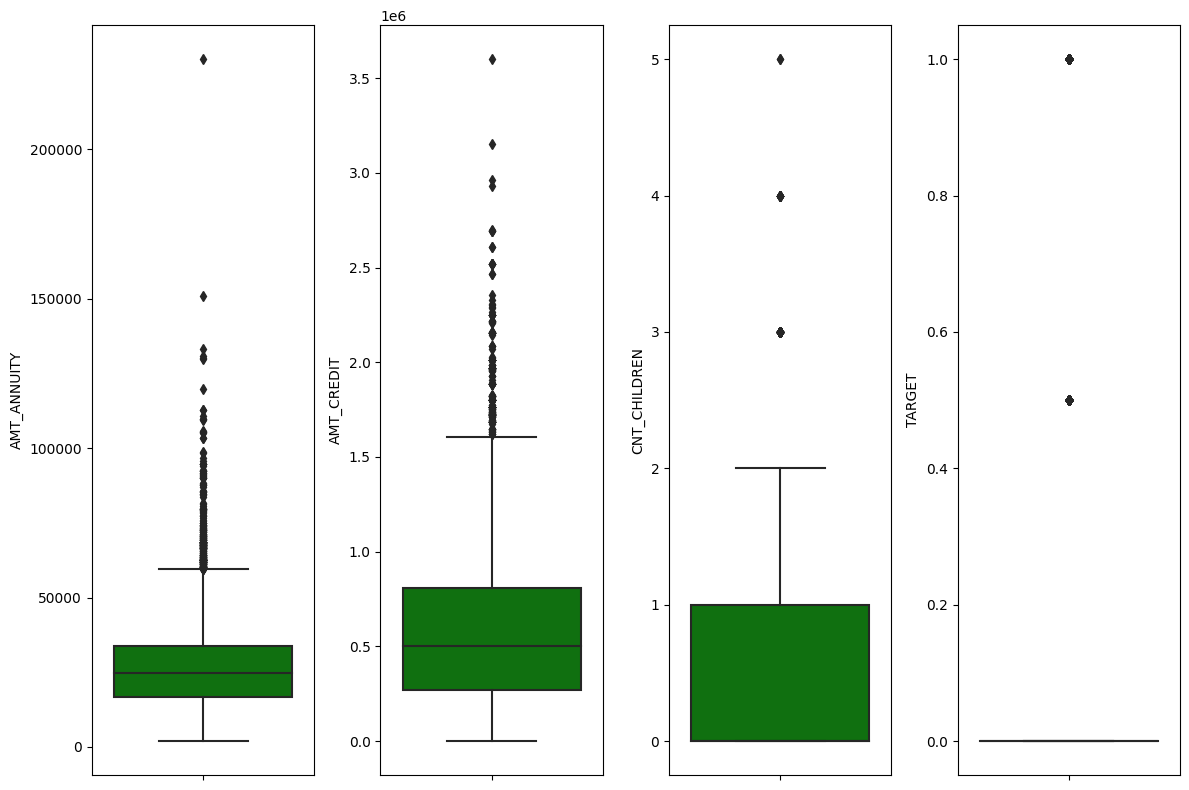

In [300]:
features = numericals
plt.figure(figsize=(12, 8))

for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_merge_join[features[i]], color='green', orient='v')
    plt.tight_layout()

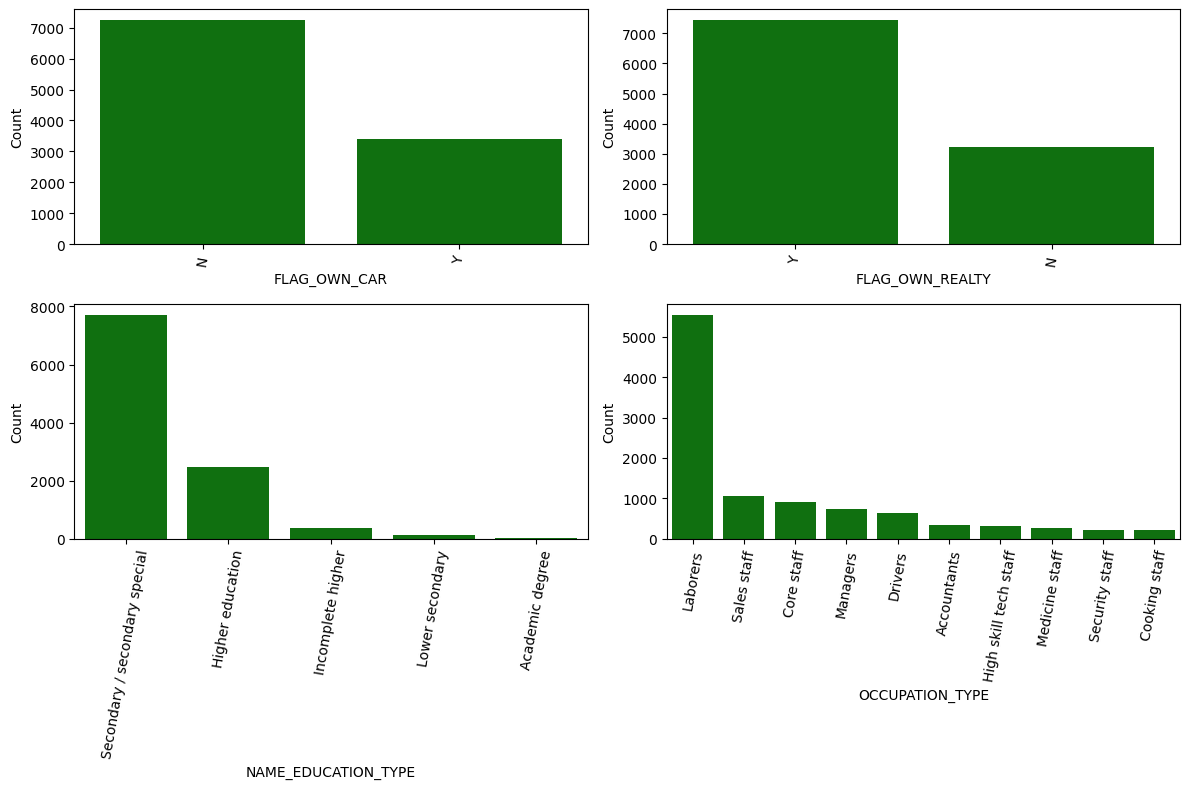

In [302]:
features=categoricals

num_rows = 2
num_cols = 2

plt.figure(figsize=(12,8))
for i in range(len(features)):
    plt.subplot(num_rows, num_cols, i+1)
    top_10_data = df_merge_join[features[i]].value_counts().head(10)

    sns.barplot(x=top_10_data.index, y=top_10_data.values, color='green')
    plt.xticks(rotation=80)
    plt.xlabel(features[i])
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

<ipython-input-303-4a58a72d49d7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_merge_join.corr()


<Axes: >

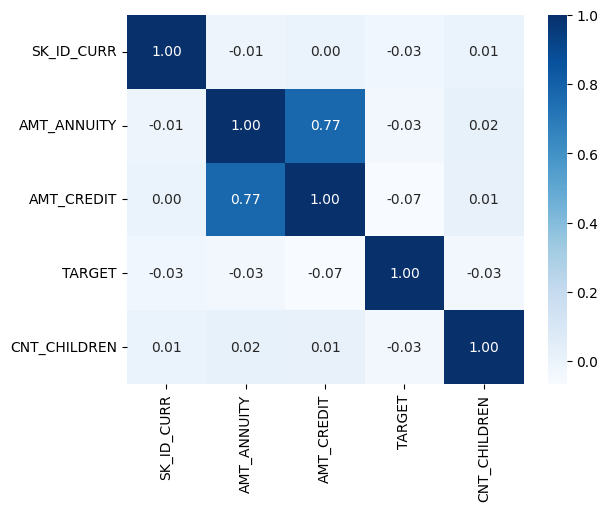

In [303]:
df = df_merge_join.select_dtypes(exclude=['object'])
df_corr = df_merge_join.corr()

sns.heatmap(df_corr, cmap='Blues', annot=True, fmt='.2f')

# **2. Data Pre-Processing**

# 1. Handling Missing Values

In [305]:
df_merge_join.isnull().sum()

SK_ID_CURR             0
AMT_ANNUITY            0
AMT_CREDIT             0
TARGET                 0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
NAME_EDUCATION_TYPE    0
OCCUPATION_TYPE        0
dtype: int64

In [297]:
df_merge_join.drop(columns=['AMT_INCOME_TOTAL'], inplace=True)

In [260]:
df_merge_join['AMT_ANNUITY'].fillna(df_merge_join['AMT_ANNUITY'].median(), inplace=True)
df_merge_join['AMT_CREDIT'].fillna(df_merge_join['AMT_CREDIT'].median(), inplace=True)
df_merge_join['AMT_INCOME_TOTAL'].fillna(df_merge_join['AMT_INCOME_TOTAL'].median(), inplace=True)

In [278]:
df_merge_join['FLAG_OWN_CAR'].fillna(df_merge_join['FLAG_OWN_CAR'].mode()[0], inplace=True)
df_merge_join['FLAG_OWN_REALTY'].fillna(df_merge_join['FLAG_OWN_REALTY'].mode()[0], inplace=True)
df_merge_join['CNT_CHILDREN'].fillna(df_merge_join['CNT_CHILDREN'].median(), inplace=True)

In [280]:
df_merge_join['CODE_GENDER'].fillna(df_merge_join['CODE_GENDER'].mode()[0], inplace=True)

In [276]:
df_merge_join['OCCUPATION_TYPE'].fillna(df_merge_join['OCCUPATION_TYPE'].mode()[0], inplace=True)

In [282]:
df_merge_join['NAME_EDUCATION_TYPE'].fillna(df_merge_join['NAME_EDUCATION_TYPE'].mode()[0], inplace=True)

In [290]:
df_merge_join.drop(columns=['SK_ID_PREV'], inplace=True)

In [283]:
df_merge_join.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,TARGET,AMT_INCOME_TOTAL,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_EDUCATION_TYPE,OCCUPATION_TYPE
0,2740736.0,163273,7875.000,157500.0,0.5,148500.0,F,N,Y,0.0,Secondary / secondary special,Laborers
1,1632887.0,334660,24835.500,115830.0,0.5,148500.0,F,N,Y,0.0,Secondary / secondary special,Laborers
2,1870958.0,275899,24035.355,257503.5,0.5,148500.0,F,N,Y,0.0,Secondary / secondary special,Laborers
3,1590112.0,115373,10794.375,53658.0,0.5,148500.0,F,N,Y,0.0,Secondary / secondary special,Laborers
4,2542497.0,124441,24835.500,0.0,0.5,148500.0,F,N,Y,0.0,Secondary / secondary special,Laborers


# 2. Handling duplicate data

In [312]:
# Menampilkan jumlah duplikat sebelum penghapusan
print("Jumlah duplikat sebelum penghapusan:", df_merge_join.duplicated().sum())

# Menghapus duplikat dari DataFrame
df_merge_join = df_merge_join.drop_duplicates()

# Menampilkan jumlah duplikat setelah penghapusan
print("Jumlah duplikat setelah penghapusan:", df_merge_join.duplicated().sum())


Jumlah duplikat sebelum penghapusan: 11
Jumlah duplikat setelah penghapusan: 0


# 3. Feature Transfomation

In [313]:
print(numericals)

['AMT_ANNUITY', 'AMT_CREDIT', 'CNT_CHILDREN', 'TARGET']


In [316]:
df_merge_join['AMT_ANNUITY_norm'] = MinMaxScaler().fit_transform(df_merge_join['AMT_ANNUITY'].values.reshape(len(df_merge_join), 1))
df_merge_join['AMT_ANNUITY_std'] = StandardScaler().fit_transform(df_merge_join['AMT_ANNUITY'].values.reshape(len(df_merge_join), 1))

In [317]:
df_merge_join[['AMT_ANNUITY', 'AMT_ANNUITY_norm', 'AMT_ANNUITY']].describe()

,AMT_ANNUITY,AMT_ANNUITY_norm,AMT_ANNUITY
count,10631.000000,10631.000000,10631.000000
mean,26847.167911,0.108973,26847.167911
std,14347.169406,0.062877,14347.169406
min,1981.620000,0.000000,1981.620000
25%,16587.000000,0.064008,16587.000000
50%,24835.500000,0.100157,24835.500000
75%,33781.500000,0.139363,33781.500000
max,230161.500000,1.000000,230161.500000


In [318]:
df_merge_join['AMT_CREDIT_norm'] = MinMaxScaler().fit_transform(df_merge_join['AMT_CREDIT'].values.reshape(len(df_merge_join), 1))
df_merge_join['AMT_CREDIT_std'] = StandardScaler().fit_transform(df_merge_join['AMT_CREDIT'].values.reshape(len(df_merge_join), 1))

In [319]:
df_merge_join[['AMT_CREDIT', 'AMT_CREDIT_norm', 'AMT_CREDIT_std']].describe()

,AMT_CREDIT,AMT_CREDIT_norm,AMT_CREDIT_std
count,1.063100e+04,10631.000000,1.063100e+04
mean,5.869246e+05,0.163035,2.245719e-16
std,4.039505e+05,0.112208,1.000047e+00
min,0.000000e+00,0.000000,-1.453030e+00
25%,2.700000e+05,0.075000,-7.845998e-01
50%,5.010008e+05,0.139167,-2.127188e-01
75%,8.055360e+05,0.223760,5.412092e-01
max,3.600000e+06,1.000000,7.459373e+00


In [320]:
df_merge_join['CNT_CHILDREN_norm'] = MinMaxScaler().fit_transform(df_merge_join['CNT_CHILDREN'].values.reshape(len(df_merge_join), 1))
df_merge_join['CNT_CHILDREN_std'] = StandardScaler().fit_transform(df_merge_join['CNT_CHILDREN'].values.reshape(len(df_merge_join), 1))

In [321]:
df_merge_join[['CNT_CHILDREN', 'CNT_CHILDREN_norm', 'CNT_CHILDREN_std']].describe()

,CNT_CHILDREN,CNT_CHILDREN_norm,CNT_CHILDREN_std
count,10631.000000,10631.000000,1.063100e+04
mean,0.399962,0.079992,-5.213276e-17
std,0.711243,0.142249,1.000047e+00
min,0.000000,0.000000,-5.623693e-01
25%,0.000000,0.000000,-5.623693e-01
50%,0.000000,0.000000,-5.623693e-01
75%,1.000000,0.200000,8.436863e-01
max,5.000000,1.000000,6.467909e+00


In [322]:
df_merge_join['TARGET_norm'] = MinMaxScaler().fit_transform(df_merge_join['TARGET'].values.reshape(len(df_merge_join), 1))
df_merge_join['TARGET_std'] = StandardScaler().fit_transform(df_merge_join['TARGET'].values.reshape(len(df_merge_join), 1))

In [323]:
df_merge_join[['TARGET','TARGET_norm', 'TARGET_std']].describe()

,TARGET,TARGET_norm,TARGET_std
count,10631.000000,10631.000000,1.063100e+04
mean,0.107092,0.107092,-2.138780e-17
std,0.284240,0.284240,1.000047e+00
min,0.000000,0.000000,-3.767850e-01
25%,0.000000,0.000000,-3.767850e-01
50%,0.000000,0.000000,-3.767850e-01
75%,0.000000,0.000000,-3.767850e-01
max,1.000000,1.000000,3.141530e+00


#. 3. Feature Encoding

In [324]:
df_merge_join.head()

,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,AMT_ANNUITY_norm,AMT_ANNUITY_std,AMT_CREDIT_norm,AMT_CREDIT_std,CNT_CHILDREN_norm,CNT_CHILDREN_std,TARGET_norm,TARGET_std
0,163273,7875.000,157500.0,0.5,F,N,Y,0.0,Secondary / secondary special,Laborers,0.025828,-1.322425,0.043750,-1.063112,0.0,-0.562369,0.5,1.382372
1,334660,24835.500,115830.0,0.5,F,N,Y,0.0,Secondary / secondary special,Laborers,0.100157,-0.140220,0.032175,-1.166273,0.0,-0.562369,0.5,1.382372
2,275899,24035.355,257503.5,0.5,F,N,Y,0.0,Secondary / secondary special,Laborers,0.096651,-0.195993,0.071529,-0.815537,0.0,-0.562369,0.5,1.382372
3,115373,10794.375,53658.0,0.5,F,N,Y,0.0,Secondary / secondary special,Laborers,0.038622,-1.118935,0.014905,-1.320191,0.0,-0.562369,0.5,1.382372
4,124441,24835.500,0.0,0.5,F,N,Y,0.0,Secondary / secondary special,Laborers,0.100157,-0.140220,0.000000,-1.453030,0.0,-0.562369,0.5,1.382372


In [329]:
df_merge_join['CODE_GENDER'] = LabelEncoder().fit_transform(df_merge_join['CODE_GENDER'])
df_merge_join['FLAG_OWN_CAR'] = LabelEncoder().fit_transform(df_merge_join['FLAG_OWN_CAR'])
df_merge_join['CNT_CHILDREN'] = LabelEncoder().fit_transform(df_merge_join['CNT_CHILDREN'])

In [331]:
df_merge_join['FLAG_OWN_REALTY'] = LabelEncoder().fit_transform(df_merge_join['FLAG_OWN_REALTY'])

In [332]:
# Melakukan one hot encoding

categoricals = ['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE']

for cat in categoricals:
    if cat in ['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE']:
        df_1 = pd.get_dummies(df_merge_join[cat], prefix=cat)
        df = df_merge_join.drop(cat, axis=1)
        df = df_merge_join.join(df_1)

df.head()

,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,163273,7875.000,157500.0,0.5,0,0,1,0,Secondary / secondary special,Laborers,...,1,0,0,0,0,0,0,0,0,0
1,334660,24835.500,115830.0,0.5,0,0,1,0,Secondary / secondary special,Laborers,...,1,0,0,0,0,0,0,0,0,0
2,275899,24035.355,257503.5,0.5,0,0,1,0,Secondary / secondary special,Laborers,...,1,0,0,0,0,0,0,0,0,0
3,115373,10794.375,53658.0,0.5,0,0,1,0,Secondary / secondary special,Laborers,...,1,0,0,0,0,0,0,0,0,0
4,124441,24835.500,0.0,0.5,0,0,1,0,Secondary / secondary special,Laborers,...,1,0,0,0,0,0,0,0,0,0


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10631 entries, 0 to 10641
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SK_ID_CURR                             10631 non-null  int64  
 1   AMT_ANNUITY                            10631 non-null  float64
 2   AMT_CREDIT                             10631 non-null  float64
 3   TARGET                                 10631 non-null  float64
 4   CODE_GENDER                            10631 non-null  int64  
 5   FLAG_OWN_CAR                           10631 non-null  int64  
 6   FLAG_OWN_REALTY                        10631 non-null  int64  
 7   CNT_CHILDREN                           10631 non-null  int64  
 8   NAME_EDUCATION_TYPE                    10631 non-null  object 
 9   OCCUPATION_TYPE                        10631 non-null  object 
 10  AMT_ANNUITY_norm                       10631 non-null  float64
 11  AM

# **4.Feature Engineering**


In [382]:
target_column = 'TARGET'

correlation_with_target = df.corr()[target_column].drop([target_column])

threshold = 0.05
columns_to_drop = correlation_with_target[abs(correlation_with_target) < threshold].index
data_filtered = df.drop(columns=columns_to_drop)

<ipython-input-382-00ab9143d878>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = df.corr()[target_column].drop([target_column])


<ipython-input-383-b5291e50f95c>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_filtered.corr(), annot=True, fmt='.3f', linewidths=0.5)


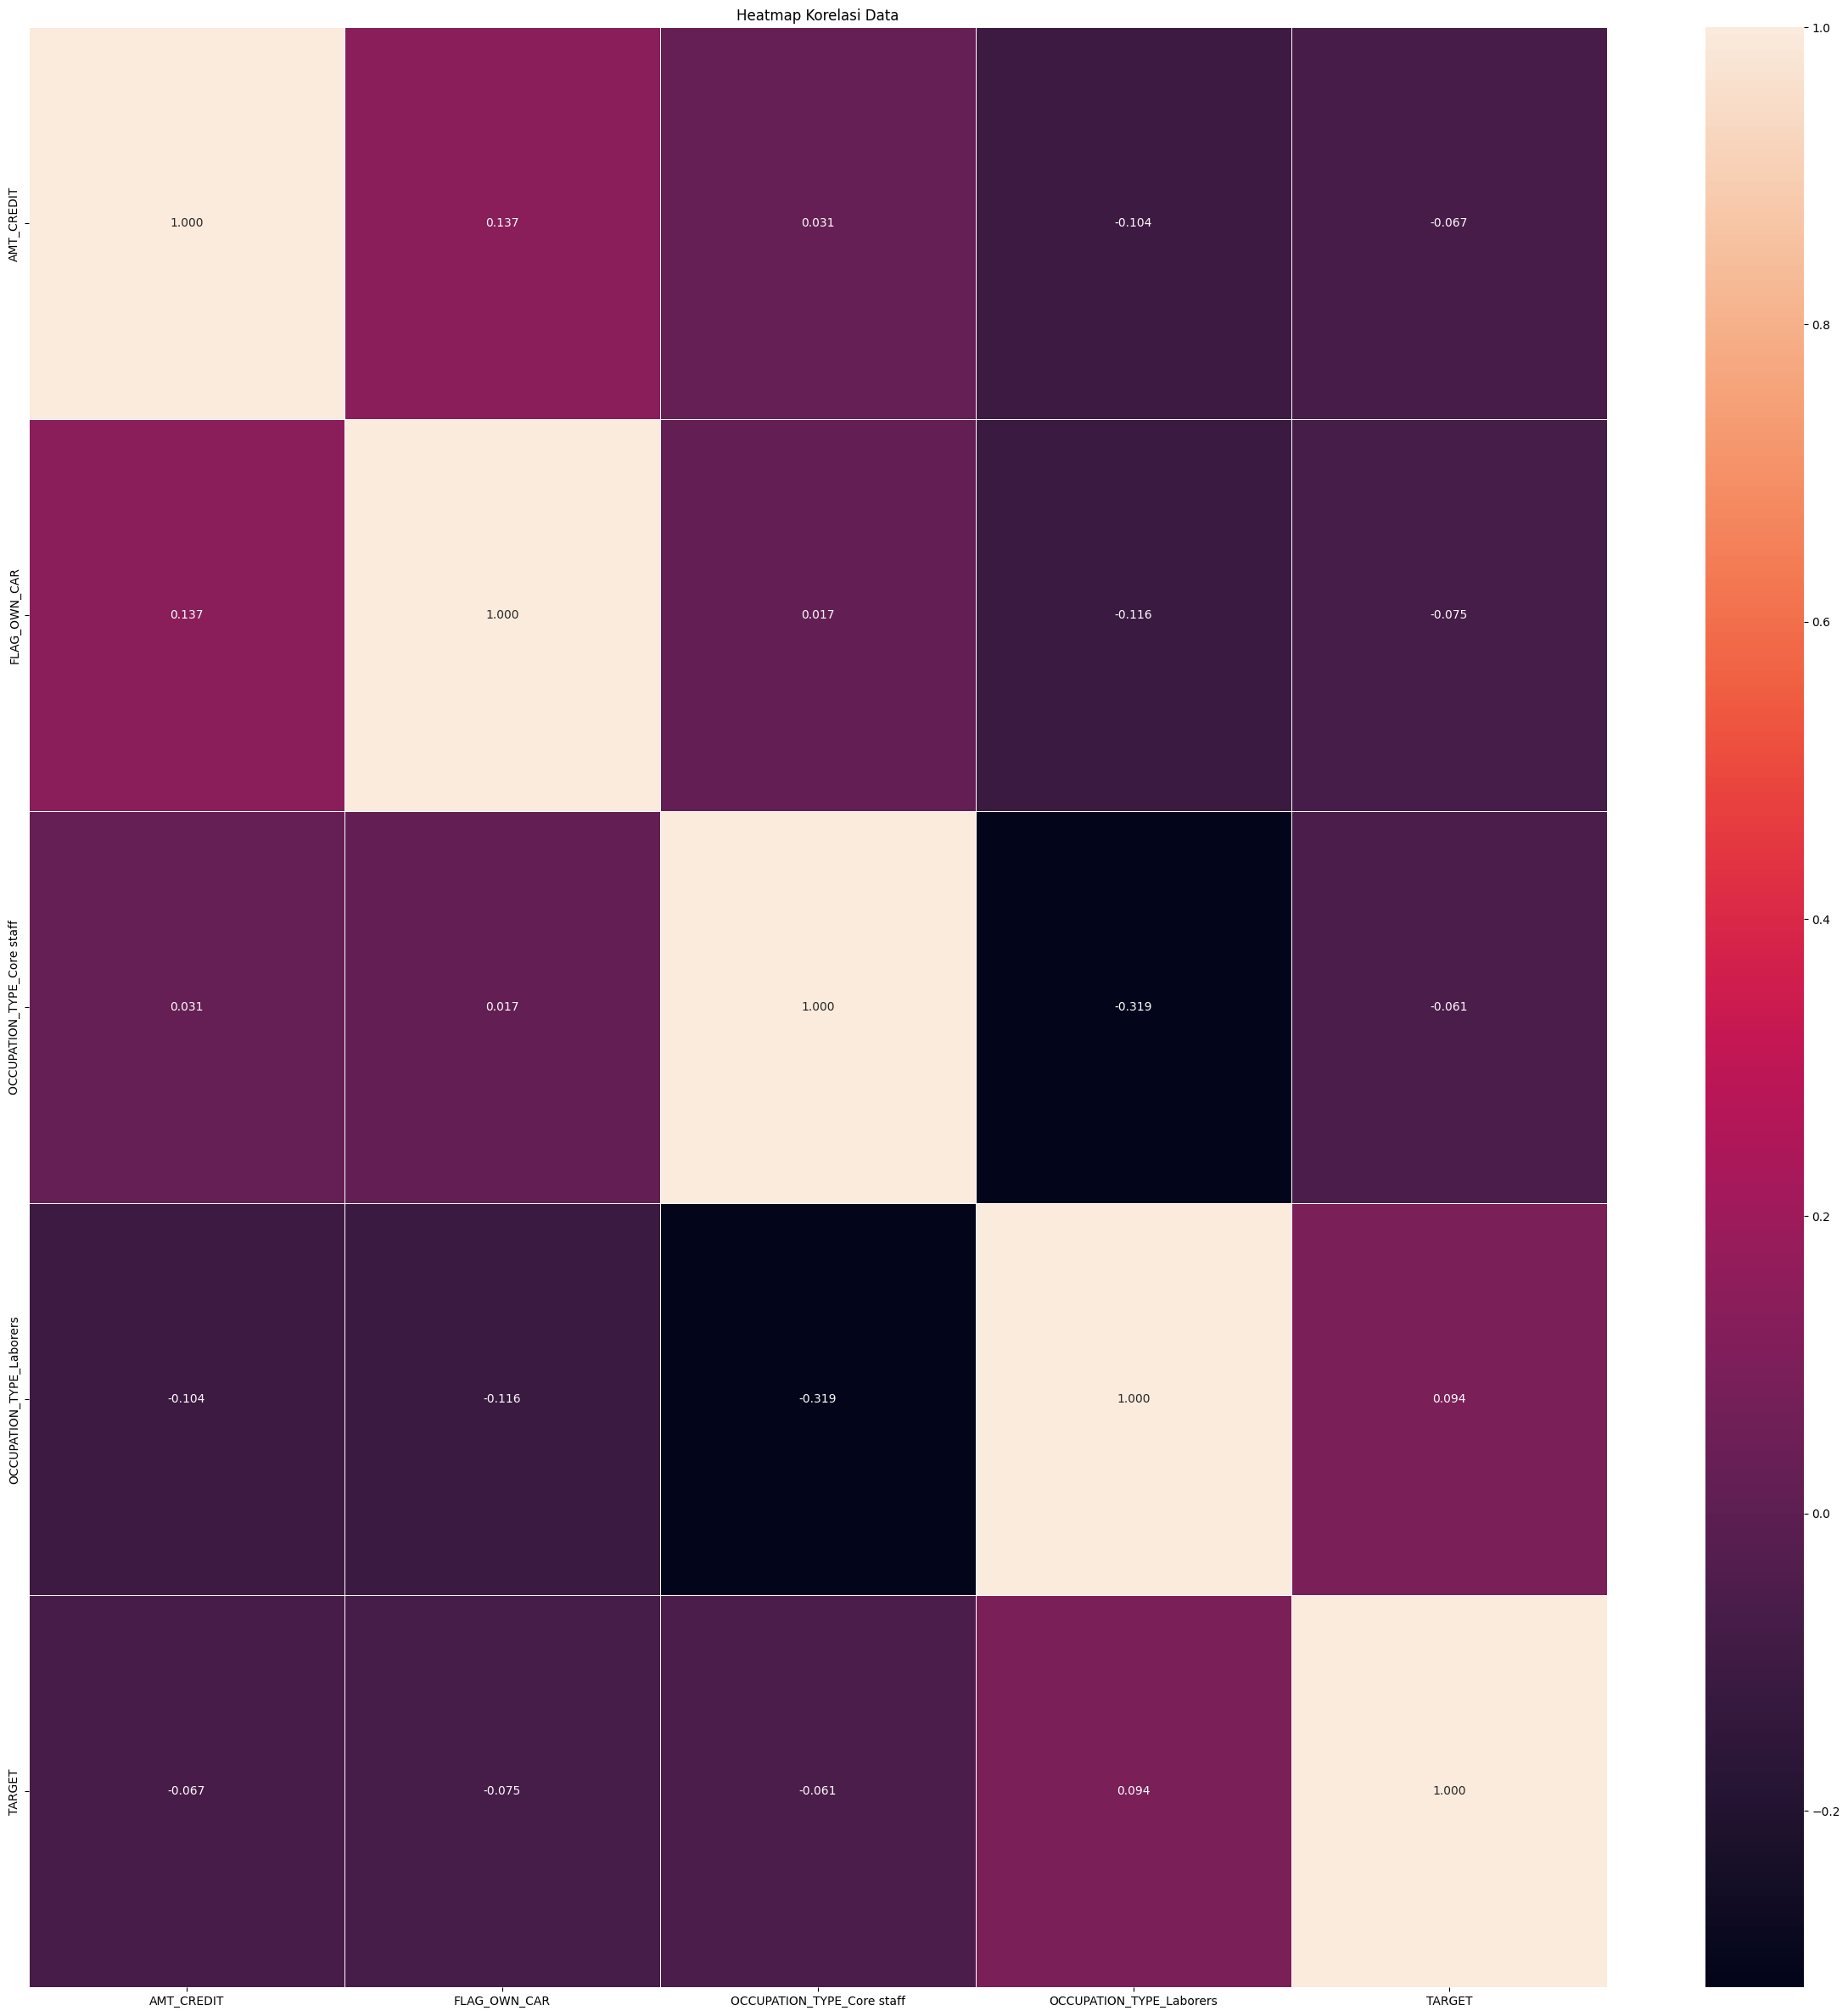

In [383]:
data_filtered = data_filtered.drop('TARGET', axis = 1)
data_filtered['TARGET'] = df['TARGET']

# Buat dan tampilkan heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(data_filtered.corr(), annot=True, fmt='.3f', linewidths=0.5)
plt.title('Heatmap Korelasi Data')
plt.show()

# 5. Class Imbalance

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10631 entries, 0 to 10641
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SK_ID_CURR                             10631 non-null  int64  
 1   AMT_ANNUITY                            10631 non-null  float64
 2   AMT_CREDIT                             10631 non-null  float64
 3   TARGET                                 10631 non-null  float64
 4   CODE_GENDER                            10631 non-null  int64  
 5   FLAG_OWN_CAR                           10631 non-null  int64  
 6   FLAG_OWN_REALTY                        10631 non-null  int64  
 7   CNT_CHILDREN                           10631 non-null  int64  
 8   NAME_EDUCATION_TYPE                    10631 non-null  object 
 9   OCCUPATION_TYPE                        10631 non-null  object 
 10  AMT_ANNUITY_norm                       10631 non-null  float64
 11  AM

In [338]:
df.drop(columns=('TARGET_norm'), inplace=True)
df.drop(columns=('TARGET_std'), inplace=True)
df.drop(columns=('AMT_ANNUITY_norm'), inplace=True)
df.drop(columns=('AMT_ANNUITY_std'), inplace=True)
df.drop(columns=('CNT_CHILDREN_norm'), inplace=True)
df.drop(columns=('CNT_CHILDREN_std'), inplace=True)
df.drop(columns=('AMT_CREDIT_norm'), inplace=True)
df.drop(columns=('AMT_CREDIT_std'), inplace=True)

In [418]:
x = data_filtered[[col for col in data_filtered.columns if col not in ['TARGET']]]
y = data_filtered['TARGET'].values

print("Jumlah perbandingan antara kelas ya, tidak, pertimbangan  sebelum class imbalance :")
print(pd.Series(y).value_counts())

Jumlah perbandingan antara kelas ya, tidak, pertimbangan  sebelum class imbalance :
0.0    9177
1.0     823
0.5     631
dtype: int64


In [419]:
# Angka 0.0 menunjukkan kelas tidak resigned dan 1.0 menunjukkan kelas resigned

count_classes = df['TARGET'].value_counts()
print("Jumlah perbandingan antara kelas ya dan tidak sebelum class imbalance:")
print(count_classes)


Jumlah perbandingan antara kelas ya dan tidak sebelum class imbalance:
0.0    9177
1.0     823
0.5     631
Name: TARGET, dtype: int64


In [420]:
y = np.where(y == 0.5, 1.0, y)

In [421]:
y_binary = np.where(y == 1.0, 1, 0)

In [422]:
print("Jumlah perbandingan antara kelas ya dan tidak setelah perubahan:")
print(pd.Series(y_binary).value_counts())

Jumlah perbandingan antara kelas ya dan tidak setelah perubahan:
0    9177
1    1454
dtype: int64


In [424]:
from imblearn.over_sampling import RandomOverSampler

# Buat instance RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Lakukan oversampling pada fitur dan target
x_resampled, y_resampled = ros.fit_resample(x, y_binary)

In [425]:
print(pd.Series(y_resampled).value_counts())

1    9177
0    9177
dtype: int64


# 6. Modeling

In [427]:
# Identifikasi kolom dengan nilai string
kolom_string = x_train.select_dtypes(include='object').columns

# Hapus kolom-kolom dengan nilai string
x_train_numerik = x_train.drop(columns=kolom_string)

# Terapkan one-hot encoding pada kolom dengan nilai string
x_train_encoded = pd.get_dummies(x_train, columns=kolom_string)

# Lanjutkan dengan melatih model menggunakan x_train_encoded
model.fit(x_train_encoded, y_train)

LogisticRegression(random_state=42)

In [429]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(x_train_encoded, y_train)

RandomForestClassifier(random_state=42)